# Predição de Casos Endêmicos Mensais de Dengue

Projeto N2 - Inteligência Artificial, 7ºN CC, Noite.

## Alunos

*  Caio Sampaio RA 10391053;
*  Guilherme Picoli RA 10389843.

## Data Set

* DataSet_PROJ_N1_Caio_S_e_Guilherme_P.csv

## Carregando o Data Set

In [6]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# ignora os warnings
import warnings
warnings.filterwarnings("ignore")
# Por se tratar de um conjunto de gráficos menores, pode ser mais interessante gerar os gráficos em janela separada
%matplotlib inline

In [7]:
# Leitura do 1o arquivo CSV com separador ";" e codificação UTF-8
dfdengue = pd.read_csv('DataSet_PROJ_N1_Caio_S_e_Guilherme_P.csv', sep = ',', encoding = 'UTF-8')

## Análise Inicial

In [ ]:
# Mostra dois registros do arquivo
dfdengue.head(2)

,cidade,ano,mes,infeccoes,populacao,infe_pop,max,media,min,ind_pluv,...,Rio Grande da Serra,Santa Isabel,Santana do Parnaíba,Santo André,São Bernardo do Campo,São Caetano do Sul,Suzano,Taboão da Serra,São Paulo,Vargem Grande Paulista
0,Arujá,2021,1,0,92453,0.000000,28,22,19,218.8,...,0,0,0,0,0,0,0,0,0,0
1,Arujá,2021,2,1,92453,0.000011,28,23,19,198.2,...,0,0,0,0,0,0,0,0,0,0


## Análise Exploratória dos Dados

In [ ]:
# Apresenta os tipos de cada coluna
dfdengue.dtypes

cidade                     object
ano                         int64
mes                         int64
infeccoes                   int64
populacao                   int64
infe_pop                  float64
max                         int64
media                       int64
min                         int64
ind_pluv                  float64
 Arujá                      int64
 Barueri                    int64
 Biritiba Mirim             int64
 Caieiras                   int64
 Cajamar                    int64
 Carapicuíba                int64
 Cotia                      int64
 Diadema                    int64
 Embu                       int64
 Embu-Guaçu                 int64
 Ferraz de Vasconcelos      int64
 Francisco Morato           int64
 Franco da Rocha            int64
 Guararema                  int64
 Guarulhos                  int64
 Itapecerica da Serra       int64
 Itapevi                    int64
 Itaquaquecetuba            int64
 Jandira                    int64
 Juquitiba    

In [ ]:
# Apresenta o tamanho do conjunto de dados
dfdengue.count()

cidade                    1332
ano                       1332
mes                       1332
infeccoes                 1332
populacao                 1332
infe_pop                  1332
max                       1332
media                     1332
min                       1332
ind_pluv                  1332
 Arujá                    1332
 Barueri                  1332
 Biritiba Mirim           1332
 Caieiras                 1332
 Cajamar                  1332
 Carapicuíba              1332
 Cotia                    1332
 Diadema                  1332
 Embu                     1332
 Embu-Guaçu               1332
 Ferraz de Vasconcelos    1332
 Francisco Morato         1332
 Franco da Rocha          1332
 Guararema                1332
 Guarulhos                1332
 Itapecerica da Serra     1332
 Itapevi                  1332
 Itaquaquecetuba          1332
 Jandira                  1332
 Juquitiba                1332
 Mairiporã                1332
 Mauá                     1332
 Mogi da

In [ ]:
# Resumo Estatístico dos dados numéricos
dfdengue.describe()

,ano,mes,infeccoes,populacao,infe_pop,max,media,min,ind_pluv,Arujá,...,Rio Grande da Serra,Santa Isabel,Santana do Parnaíba,Santo André,São Bernardo do Campo,São Caetano do Sul,Suzano,Taboão da Serra,São Paulo,Vargem Grande Paulista
count,1332.000000,1332.000000,1332.000000,1.332000e+03,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,...,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000
mean,2022.000000,6.500000,35.250751,5.582916e+05,0.000065,24.700450,20.036036,16.759009,113.831306,0.027027,...,0.027027,0.027027,0.024775,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027
std,0.816803,3.453349,252.269605,1.835461e+06,0.000361,2.661674,2.401832,2.861654,56.659591,0.162223,...,0.162223,0.162223,0.155496,0.162223,0.162223,0.162223,0.162223,0.162223,0.162223,0.162223
min,2021.000000,1.000000,0.000000,3.538000e+03,0.000000,12.000000,14.000000,10.000000,38.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,3.750000,0.000000,9.268900e+04,0.000000,23.000000,18.000000,14.000000,62.550000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2022.000000,6.500000,2.000000,1.651390e+05,0.000008,25.000000,20.000000,17.000000,102.350000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2023.000000,9.250000,7.000000,3.692750e+05,0.000034,27.000000,22.000000,19.000000,157.375000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2023.000000,12.000000,4333.000000,1.145200e+07,0.009327,30.000000,25.000000,27.000000,219.400000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Frequência absoluta e relativa do atributo ano
df_ano = pd.value_counts(dfdengue['ano']).to_frame(name='fabs').rename_axis('ano').sort_index()
df_ano['frel'] = (pd.value_counts(dfdengue['ano']) / len(dfdengue['ano']))*100
df_ano

,fabs,frel
ano,,
2021,444,33.333333
2022,444,33.333333
2023,444,33.333333


In [ ]:
# remove a coluna cidade
dfdengue.drop(['cidade'], axis='columns', inplace=True)

In [ ]:
# Correlação de Pearson
dfdengue.corr(method = 'pearson')

,ano,mes,infeccoes,populacao,infe_pop,max,media,min,ind_pluv,Arujá,...,Rio Grande da Serra,Santa Isabel,Santana do Parnaíba,Santo André,São Bernardo do Campo,São Caetano do Sul,Suzano,Taboão da Serra,São Paulo,Vargem Grande Paulista
ano,1.000000e+00,2.179779e-15,0.038004,4.433945e-14,0.013090,-2.992210e-14,-6.302772e-15,2.000984e-14,-2.504270e-15,-4.807702e-14,...,1.661324e-14,3.070166e-14,4.153897e-14,4.111901e-14,1.439139e-14,1.856318e-14,4.118523e-14,4.108856e-14,4.166488e-14,4.813731e-14
mes,2.179779e-15,1.000000e+00,-0.052449,1.810424e-17,-0.077734,-2.269469e-01,-2.864182e-01,-2.902307e-01,-2.905759e-01,2.438150e-17,...,9.045350e-18,2.274366e-17,2.308580e-02,1.448000e-17,2.799219e-17,7.146943e-18,3.052340e-17,3.294294e-17,5.494212e-17,6.313133e-17
infeccoes,3.800426e-02,-5.244866e-02,1.000000,5.830977e-01,0.069595,-6.522796e-04,1.481730e-03,2.085102e-03,-4.733156e-02,-1.962606e-02,...,-2.315095e-02,-2.125999e-02,-1.722380e-02,-1.340242e-02,-1.444888e-02,-1.878155e-02,5.803948e-01,-4.535121e-03,-2.076430e-02,-2.291228e-02
populacao,4.433945e-14,1.810424e-17,0.583098,1.000000e+00,-0.001907,3.240390e-02,2.702951e-02,1.803781e-02,9.820332e-04,-4.231577e-02,...,-4.670170e-02,-5.039262e-02,-3.511174e-02,1.731618e-02,2.293086e-02,-3.566626e-02,9.895608e-01,-2.278782e-02,-2.586604e-02,-4.613441e-02
infe_pop,1.308979e-02,-7.773444e-02,0.069595,-1.907455e-03,1.000000,2.834081e-05,-2.509698e-02,-4.099774e-02,-7.405571e-02,-2.454011e-03,...,-2.789561e-02,3.724731e-01,-5.960582e-03,-2.098265e-02,-2.258935e-02,-1.115959e-02,6.634930e-03,1.244896e-02,-2.374497e-02,-2.487384e-02
max,-2.992210e-14,-2.269469e-01,-0.000652,3.240390e-02,0.000028,1.000000e+00,8.284671e-01,4.480044e-01,7.029384e-01,2.398407e-02,...,-5.953694e-02,7.618470e-02,2.883617e-02,-7.336305e-03,-7.336305e-03,-2.116242e-03,2.398407e-02,1.354395e-02,1.876401e-02,-5.606630e-01
media,-6.302772e-15,-2.864182e-01,0.001482,2.702951e-02,-0.025097,8.284671e-01,1.000000e+00,8.509356e-01,8.570952e-01,-2.564071e-02,...,-2.564071e-02,2.642244e-02,1.571285e-02,-2.501533e-03,3.283262e-03,3.283262e-03,2.642244e-02,-1.407112e-02,-2.501533e-03,-5.456468e-02
min,2.000984e-14,-2.902307e-01,0.002085,1.803781e-02,-0.040998,4.480044e-01,8.509356e-01,1.000000e+00,7.760776e-01,-5.878815e-02,...,9.185648e-03,-1.994598e-02,-2.202952e-02,4.330377e-03,1.404092e-02,1.404092e-02,2.375146e-02,-4.422234e-02,-5.248942e-04,4.315943e-01
ind_pluv,-2.504270e-15,-2.905759e-01,-0.047332,9.820332e-04,-0.074056,7.029384e-01,8.570952e-01,7.760776e-01,1.000000e+00,4.370894e-03,...,1.523417e-02,3.610709e-03,-3.851358e-02,7.902072e-03,8.809388e-03,5.596997e-03,-2.147338e-04,9.888360e-03,2.021414e-04,-1.328500e-02
Arujá,-4.807702e-14,2.438150e-17,-0.019626,-4.231577e-02,-0.002454,2.398407e-02,-2.564071e-02,-5.878815e-02,4.370894e-03,1.000000e+00,...,-2.777778e-02,-2.777778e-02,-2.656447e-02,-2.777778e-02,-2.777778e-02,-2.777778e-02,-2.777778e-02,-2.777778e-02,-2.777778e-02,-2.777778e-02


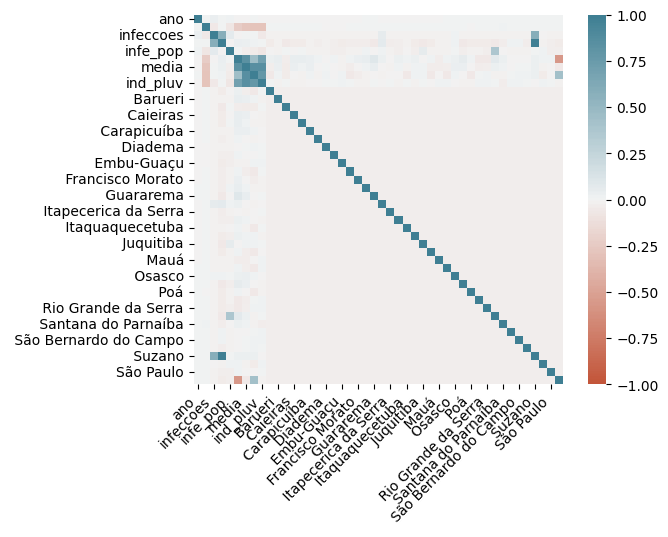

In [ ]:
# Cria o heatmap contendo a correlação entre todos os atributos do conjunto de dados
corr = dfdengue.corr(method = 'pearson')
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0, # valor mínimo, máximo e o centro
    cmap=sns.diverging_palette(20, 220, n=200), # paleta de cores
    square=True # forma de um quadrado
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45, # rotaciona o eixo y 45o
    horizontalalignment='right'
);
# Salva a Figura do Heatmap
#plt.savefig("imagens/heatmapImoveis.png", bbox_inches="tight")

In [ ]:
# Verificando o skew de cada atributo
# Apresenta a kurtosis de todos os atributos
dfdengue.skew()

ano                        0.000000
mes                        0.000000
infeccoes                 13.126046
populacao                  5.654799
infe_pop                  17.681826
max                       -1.116474
media                     -0.107968
min                        0.271055
ind_pluv                   0.440467
 Arujá                     5.839912
 Barueri                   5.839912
 Biritiba Mirim            5.839912
 Caieiras                  5.839912
 Cajamar                   5.839912
 Carapicuíba               5.839912
 Cotia                     5.839912
 Diadema                   5.839912
 Embu                      5.839912
 Embu-Guaçu                5.839912
 Ferraz de Vasconcelos     5.839912
 Francisco Morato          5.839912
 Franco da Rocha           5.839912
 Guararema                 5.839912
 Guarulhos                 5.839912
 Itapecerica da Serra      5.839912
 Itapevi                   5.839912
 Itaquaquecetuba           5.839912
 Jandira                   5

In [ ]:
# Apresenta a kurtosis de todos os atributos
dfdengue.kurtosis()

ano                        -1.501128
mes                        -1.216845
infeccoes                 189.861585
populacao                  30.710160
infe_pop                  390.732215
max                         2.897895
media                      -1.290151
min                        -0.011378
ind_pluv                   -1.064591
 Arujá                     32.152846
 Barueri                   32.152846
 Biritiba Mirim            32.152846
 Caieiras                  32.152846
 Cajamar                   32.152846
 Carapicuíba               32.152846
 Cotia                     32.152846
 Diadema                   32.152846
 Embu                      32.152846
 Embu-Guaçu                32.152846
 Ferraz de Vasconcelos     32.152846
 Francisco Morato          32.152846
 Franco da Rocha           32.152846
 Guararema                 32.152846
 Guarulhos                 32.152846
 Itapecerica da Serra      32.152846
 Itapevi                   32.152846
 Itaquaquecetuba           32.152846
 

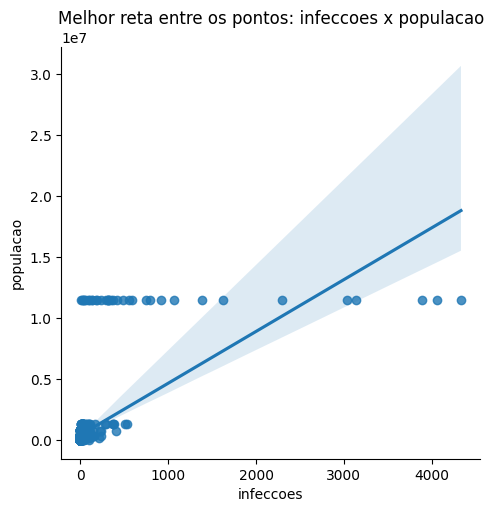

In [ ]:
# Apresenta o gráfico de pontos entre infecções e população e a melhor linha entre eles
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='infeccoes', y='populacao', data=dfdengue)
plt.title("Melhor reta entre os pontos: infeccoes x populacao");
# Salva a Figura
#plt.savefig("imagens/scatterAreaTotalPreco.png", bbox_inches="tight")

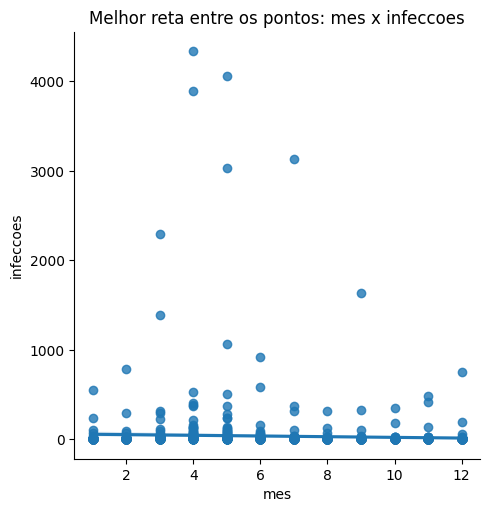

In [ ]:
# Apresenta o gráfico de pontos entre infecções e mês e a melhor linha entre eles
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='mes', y='infeccoes', data=dfdengue)
plt.title("Melhor reta entre os pontos: mes x infeccoes");
# Salva a Figura
#plt.savefig("imagens/scatterAreaTotalPreco.png", bbox_inches="tight")

<Axes: >

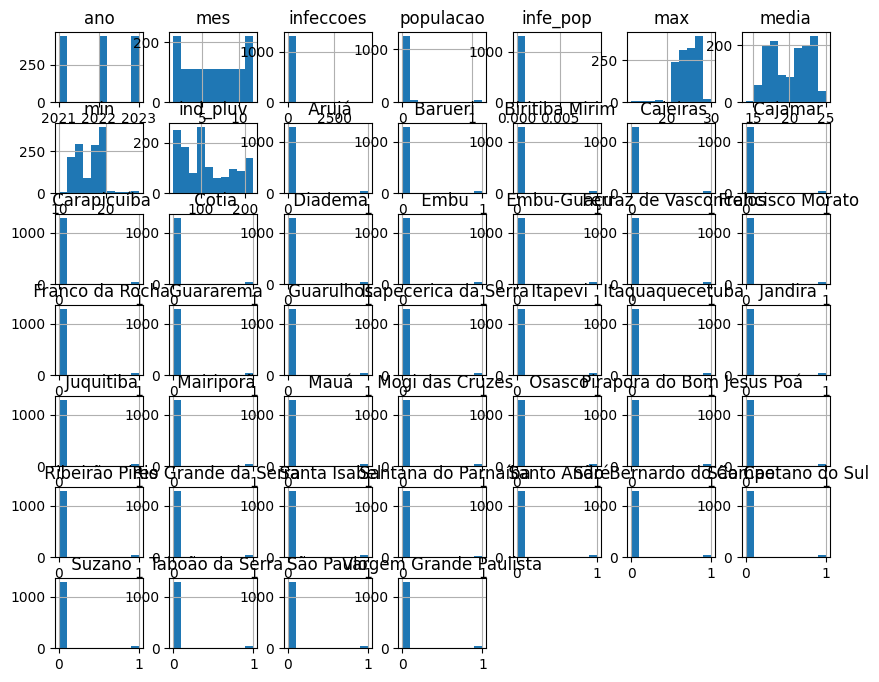

In [ ]:
# Apresenta o histograma de todos os atributos
dfdengue.hist().all()
# Salva a Figura
#plt.savefig("imagens/histogramaImoveis.png", bbox_inches="tight")

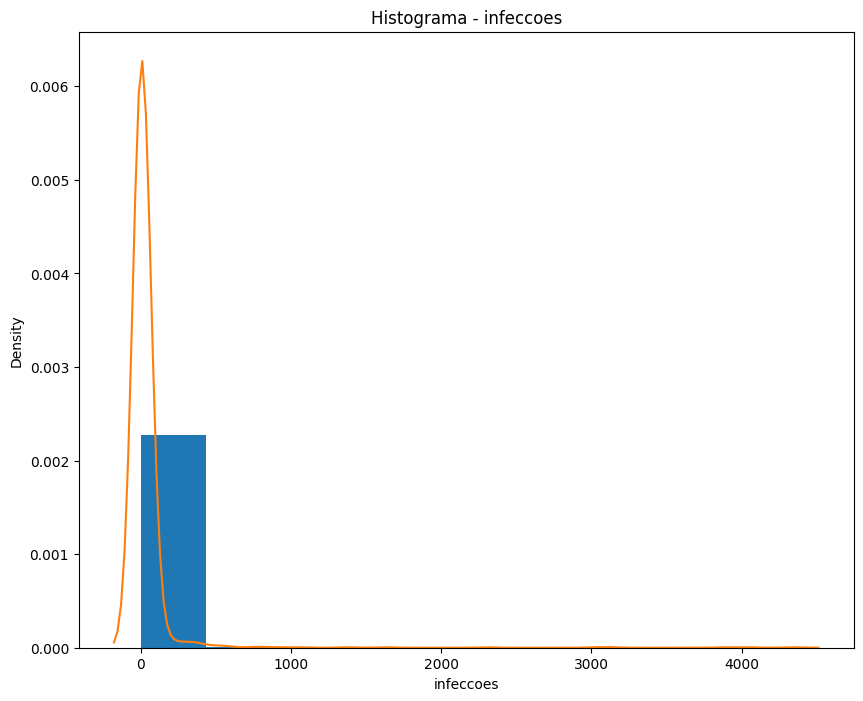

sk = 13.126046171264715, Ck = 189.8615846142338
Média=35.250750750750754, Mediana=2.0, Moda=0    0
Name: infeccoes, dtype: int64


In [ ]:
# plota o histograma com a melhor curva associada
plt.figure()
plt.hist(dfdengue['infeccoes'], histtype='barstacked',  density=True);
sns.kdeplot(dfdengue['infeccoes']);
plt.title("Histograma - infeccoes")

# Salva a Figura


plt.show()

# apresenta o skewness e a kurtosis abaixo do gráfico
print("sk = {}, Ck = {}".format(dfdengue['infeccoes'].skew(), dfdengue['infeccoes'].kurtosis()))
print("Média={}, Mediana={}, Moda={}".format(dfdengue['infeccoes'].mean(), dfdengue['infeccoes'].median(), dfdengue['infeccoes'].mode()))

# Variáveis Categóricas

O pacote statsmodel permite empregar variáveis categóricas diretamente. Como o cálculo dos coeficientes requer atributos numéricos o pacote transforma esses atributos internamente fazendo o hot encode dos dados. Os atributos cujo valor p > 0.05 foram eliminados.

In [ ]:
# Necessário importar a biblioteca stasmodels.formula.api
import statsmodels.formula.api as sm

In [ ]:
# Definição do modelo
model = sm.ols(formula='infeccoes ~ populacao', data=dfdengue)

In [ ]:
# Treinamento
result = model.fit()

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              infeccoes   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     685.2
Date:                Fri, 17 May 2024   Prob (F-statistic):          3.71e-122
Time:                        17:27:40   Log-Likelihood:                -8979.4
No. Observations:                1332   AIC:                         1.796e+04
Df Residuals:                    1330   BIC:                         1.797e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.4920      5.872     -1.617      0.1

In [ ]:
dfdengue['predicted'] = result.predict(dfdengue.populacao)

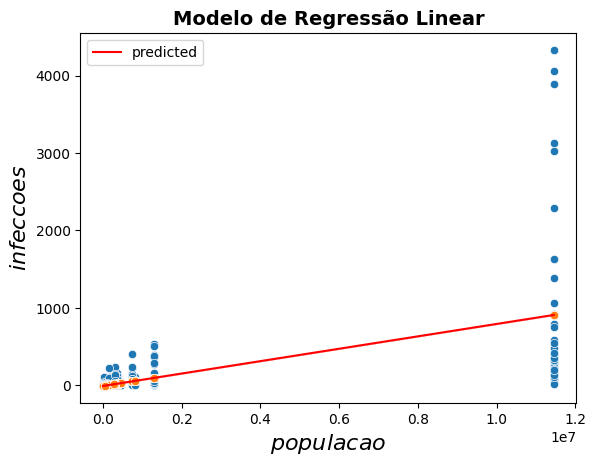

In [ ]:
sns.scatterplot(x='populacao',y='infeccoes',data=dfdengue)
sns.scatterplot(x='populacao',y='predicted',data=dfdengue)
sns.lineplot(x='populacao',y='predicted',data=dfdengue,color='red', label='predicted')

plt.title('Modelo de Regressão Linear', fontsize=14, weight='bold')
plt.xlabel('$populacao$', fontsize=16)
plt.ylabel('$infeccoes$', fontsize=16)

plt.legend()
plt.show()

In [ ]:
model = sm.ols(formula="infeccoes ~ populacao + mes +	max + media + min + ind_pluv", data=dfdengue)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              infeccoes   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     118.7
Date:                Fri, 17 May 2024   Prob (F-statistic):          4.98e-120
Time:                        17:29:45   Log-Likelihood:                -8969.7
No. Observations:                1332   AIC:                         1.795e+04
Df Residuals:                    1325   BIC:                         1.799e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -86.3762     87.063     -0.992      0.3

In [ ]:
model = sm.ols(formula="infeccoes ~ populacao + mes + max + media + min + ind_pluv + Aruja + Barueri + Biritiba_Mirim + Caieiras + Cajamar + Carapicuiba + Cotia + Diadema + Embu + Embu-Guacu + Ferraz_de_Vasconcelos + Francisco_Morato + Franco_da_Rocha + Guararema + Guarulhos + Itapecerica_da_Serra + Itapevi + Itaquaquecetuba + Jandira + Juquitiba + Mairipora + Maua + Mogi_das_Cruzes + Osasco + Pirapora_do_Bom_Jesus + Poa + Ribeirao_Pires + Rio_Grande_da_Serra + Santa_Isabel + Santana_do_Parnaiba + Santo_Andre + Sao_Bernardo_do_Campo + Sao_Caetano_do_Sul + Suzano + Taboao_da_Serra + Sao_Paulo + Vargem_Grande_Paulista", data=dfdengue)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              infeccoes   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     16.83
Date:                Fri, 17 May 2024   Prob (F-statistic):           3.52e-94
Time:                        17:29:54   Log-Likelihood:                -8964.9
No. Observations:                1332   AIC:                         1.802e+04
Df Residuals:                    1289   BIC:                         1.824e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 81

A melhor combinação encontrada foi: formula="infeccoes ~ populacao + mes +	max + media + min + ind_pluv

# Regressão Linear

In [8]:
# Import dos módulos
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [9]:
dfdengue = pd.read_csv('DataSet_PROJ_N1_Caio_S_e_Guilherme_P.csv', sep = ',', encoding = 'UTF-8')

dfdengue.drop(columns=['cidade','ano','infe_pop','Aruja','Barueri','Biritiba_Mirim','Caieiras','Cajamar','Carapicuiba','Cotia','Diadema','Embu','Embu_Guacu','Ferraz_de_Vasconcelos','Francisco_Morato','Franco_da_Rocha','Guararema','Guarulhos','Itapecerica_da_Serra','Itapevi','Itaquaquecetuba','Jandira','Juquitiba','Mairipora','Maua','Mogi_das_Cruzes','Osasco','Pirapora_do_Bom_Jesus','Poa','Ribeirao_Pires','Rio_Grande_da_Serra','Santa_Isabel','Santana_do_Parnaiba','Santo_Andre','Sao_Bernardo_do_Campo','Sao_Caetano_do_Sul','Suzano','Taboao_da_Serra','Sao_Paulo','Vargem_Grande_Paulista'], inplace=True)

array = dfdengue.values

In [10]:
# Separando o array em atributos de entrada e saída
#X = dfdengue.iloc[:, :-1].values
#Y = dfdengue.iloc[:, -1].values

X = dfdengue.drop(columns=['infeccoes']).values
Y = dfdengue['infeccoes'].values

In [11]:
# Instanciando o modelo
modelo = LinearRegression()

In [12]:
# Definindo o tamanho das amostras
teste_size = 0.35

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a métrica com outros algoritmos de Aprendizado de Máquina.
seed = 7

In [13]:
# Divide os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = teste_size, random_state = seed)

In [14]:
# Treinando o modelo
modelo.fit(X_train, Y_train)

LinearRegression()

In [15]:
# Fazendo previsões
Y_pred = modelo.predict(X_test)

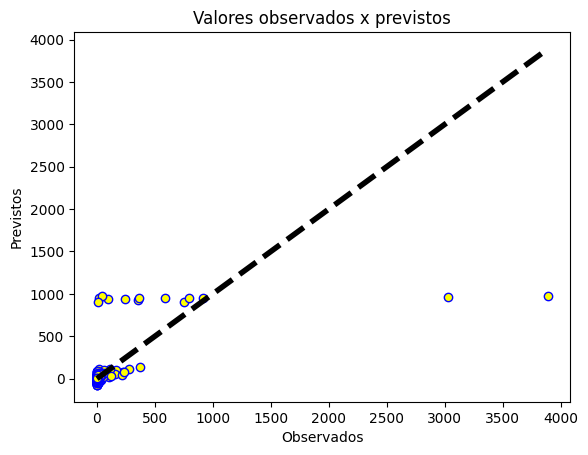

In [16]:
# Monta o gráfico das observações pelos valores previstos dos dados de teste
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_pred, edgecolors='blue', color='yellow')
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_title("Valores observados x previstos")
ax.set_xlabel('Observados')
ax.set_ylabel('Previstos')
plt.show()

In [18]:
# Resultado
r2 = r2_score(Y_test, Y_pred)
print("O R2 do modelo é:", r2)

O R2 do modelo é: 0.34106370745761927


# Salvando o modelo

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import warnings

# Importando o pacote utilizado para salvar e carregar o modelo como arquivo binário
import joblib

In [20]:
# Leitura do arquivo CSV
dfdengue = pd.read_csv('DataSet_PROJ_N1_Caio_S_e_Guilherme_P.csv', sep = ',', encoding = 'UTF-8')

dfdengue.drop(columns=['cidade','ano','infe_pop','Aruja','Barueri','Biritiba_Mirim','Caieiras','Cajamar','Carapicuiba','Cotia','Diadema','Embu','Embu_Guacu','Ferraz_de_Vasconcelos','Francisco_Morato','Franco_da_Rocha','Guararema','Guarulhos','Itapecerica_da_Serra','Itapevi','Itaquaquecetuba','Jandira','Juquitiba','Mairipora','Maua','Mogi_das_Cruzes','Osasco','Pirapora_do_Bom_Jesus','Poa','Ribeirao_Pires','Rio_Grande_da_Serra','Santa_Isabel','Santana_do_Parnaiba','Santo_Andre','Sao_Bernardo_do_Campo','Sao_Caetano_do_Sul','Suzano','Taboao_da_Serra','Sao_Paulo','Vargem_Grande_Paulista'], inplace=True)

# Salvar o DataFrame atualizado de volta no arquivo CSV
dfdengue.to_csv('DataSet_Limpo_PROJ_N1_Caio_S_e_Guilherme_P.csv', sep = ',', encoding = 'UTF-8')

In [21]:
# Carregando os dados
array = dfdengue.values

In [22]:
# Separação dos dados em atributos e alvo
X = dfdengue.drop(columns=['infeccoes']).values
Y = dfdengue['infeccoes'].values

In [23]:
# Instanciando o modelo
modelo = LinearRegression()

In [24]:
# Definindo o tamanho das amostras
teste_size = 0.35

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a métrica com outros algoritmos de Aprendizado de Máquina.
seed = 7

In [25]:
# Divide os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = teste_size, random_state = seed)

In [26]:
modelo.fit(X_train, Y_train)

LinearRegression()

In [27]:
# Fazendo previsões
Y_pred = modelo.predict(X_test)

In [28]:
# Salvando o modelo
arquivo = 'Modelo_Projeto_N2_Predicao_de_Casos_Endemicos_Mensais_de_Dengue_07N_CaioS_e_GuilhermeP.sav'
joblib.dump(modelo, arquivo)
print("Modelo salvo!")

Modelo salvo!


In [29]:
# Carregando o arquivo
modelo_regressor_final = joblib.load(arquivo)
print("Modelo carregado!")

Modelo carregado!


In [30]:
# Fazendo previsões
Y_pred = modelo_regressor_final.predict(X_test)

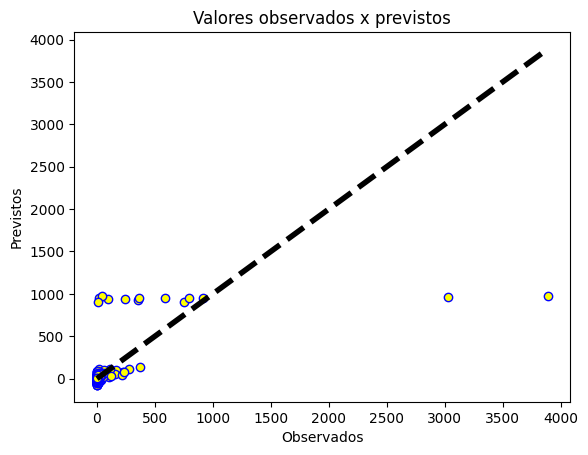

In [31]:
# Monta o gráfico das observações pelos valores previstos dos dados de teste
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_pred, edgecolors='blue', color='yellow')
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_title("Valores observados x previstos")
ax.set_xlabel('Observados')
ax.set_ylabel('Previstos')
plt.show()

In [33]:
# Resultado
r2 = r2_score(Y_test, Y_pred)
print("O R2 do modelo é:", r2)

O R2 do modelo é: 0.34106370745761927


# Testando o Modelo

### Teste 1:

In [34]:
dadosTeste = pd.DataFrame({'mes': [5], 'populacao': [11451999], 'max': [32], 'media': [27], 'min': [20], 'ind_pluv': [108]})
infeccoesEstimado = modelo_regressor_final.predict(dadosTeste)[0]

print(f'{infeccoesEstimado} infectados')

1013.5332151744996 infectados


* Valor esperado: 1023 infectados
* Valor predito: 1013.53 => 1014

Erro = | 1023 - 1014 | = 9

### Teste 2:

In [35]:
dadosTeste = pd.DataFrame({'mes': [7], 'populacao': [810729], 'max': [29], 'media': [26], 'min': [24], 'ind_pluv': [112]})
infeccoesEstimado = modelo_regressor_final.predict(dadosTeste)[0]

print(f'{infeccoesEstimado} infectados')

117.42141827265904 infectados


* Valor esperado: 104 infectados
* Valor predito: 117 infectados

Erro = | 104 - 117 | = 13

### Teste 3:

In [50]:
dadosTeste = pd.DataFrame({'mes': [4], 'populacao': [1291771], 'max': [24], 'media': [21], 'min': [18], 'ind_pluv': [43]})
infeccoesEstimado = modelo_regressor_final.predict(dadosTeste)[0]

print(f'{infeccoesEstimado} infectados')

165.58967956220266 infectados


* Valor esperado: 178 infectados
* Valor predito: 166 infectados

Erro = | 178 - 166 | = 13

### Teste 4:

In [51]:
dadosTeste = pd.DataFrame({'mes': [6], 'populacao': [451505], 'max': [32], 'media': [16], 'min': [13], 'ind_pluv': [57]})
infeccoesEstimado = modelo_regressor_final.predict(dadosTeste)[0]

print(f'{infeccoesEstimado} infectados')

8.766917348026084 infectados


* Valor esperado: 17 infectados
* Valor predito: 9 infectados

Erro = | 17 - 9 | = 8

### Teste 5:

In [52]:
dadosTeste = pd.DataFrame({'mes': [4], 'populacao': [158522], 'max': [25], 'media': [21], 'min': [18], 'ind_pluv': [93]})
infeccoesEstimado = modelo_regressor_final.predict(dadosTeste)[0]

print(f'{infeccoesEstimado} infectados')

40.070122312684234 infectados


* Valor esperado: 34 infectados
* Valor predito: 40 infectados

Erro = | 34 - 40 | = 6



> *Notebook: Projeto N2 (07N), Predição de Casos Endêmicos Mensais de Dengue. Caio Sampaio e  Guilherme Picoli. 2024.*

